In [ ]:
import ultralytics
from ultralytics import settings

ultralytics.checks()

settings.update(
    {"datasets_dir": "../data", "weights_dir": "./weights", "runs_dir": "./runs"}
)

print(settings)

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")
results = model.train(data="../config/dfire.yml", epochs=3, imgsz=640, batch=1, device="cpu")

In [ ]:
# export the model to a TensorRT format
model.export(format="engine")

# export the model to ONNX format (better on CPU)
model.export(format="onnx")

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading best.onnx for ONNX Runtime inference...
Using ONNX Runtime CPUExecutionProvider

image 1/1 /home/fermat/Documents/oit/fire-hazard-detection-system/computer-vision/notebooks/2025-07-09_18-25.png: 640x640 1 fire, 2 smokes, 50.3ms
Speed: 12.5ms preprocess, 50.3ms inference, 16.2ms postprocess per image at shape (1, 3, 640, 640)


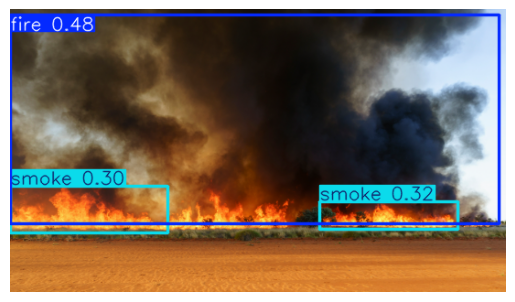

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

onnx_model = YOLO("./best.onnx")
results = onnx_model("./2025-07-09_18-25.png")

# Visualize the results
for i, r in enumerate(results):
    im_bgr = r.plot()
    plt.imshow(im_bgr[..., ::-1])  # RGB-order PIL image
    plt.axis("off")
    plt.show()

So I think I inversed the two classes, but I will fix it.